## Schritt 1: Ask an interesting question

Dieser Datensatz stammt von einer Direktmarketing-Kampagne einer portugiesischen Bank. Eine Erklärung der einzelnen Features finden Sie in der dazugehörigen PDF *Beschreibung Datensatz Übung ML1.pdf*.

Das Klassifizierungsziel ist, ob ein Kunde eine Festgeldanlage tätigen wird (label mit Namen **y**). Zusätzlich interessiert es uns auch, was die wichtigsten Eigenschaften sind, um einen zukünftigen Kunden zu bestimmen.

Insgesamt sind folgende Aufgaben zu erledigen:
1. Daten einlesen
2. Data Engineering und Cleaning: alle Features und das Label in Datentypen Integer (Ganzzahlen) oder float (Kommazahlen) umwandeln. Zusätzlich Werte löschen, die nicht sinnvoll sind (zu Übungszwecken haben wir ein paar eingebaut. Das passiert leider auch im reellen Leben....)
3. Outlier Detection: gibt es welche? wenn ja, löschen?
4. Vorbereitung Maschinelles Lernen: Aufteilen in X und y sowie dann aufteilen in Trainings- und Testmenge
5. Anwendung von 2 Algorithmen des maschinellen Lernens (bspw. Decision Tree, SVM) sowie Random Forest
6. Visualisieren der wichtigsten Features, bspw. des Random Forests.


## Schritt 2: Get the data

In [1]:
import pandas as pd   # Importieren Standard-Library für das Bearbeiten und Laden von Daten ("Data Engineering").
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns   # verschönert Matplotlib-Graphiken
import numpy as np # Standard-Library für Rechnen

In [2]:
from google.colab import files
files.upload();

Saving Datensatz_Direktmarketing.csv to Datensatz_Direktmarketing.csv


In [3]:
marketing_df = pd.read_csv('Datensatz_Direktmarketing.csv', sep=';')
marketing_df

/tmp/ipython-input-3338570148.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  marketing_df = pd.read_csv('Datensatz_Direktmarketing.csv', sep=';')


,age,job,marital,education,default,sex,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,nr.employed
0,56,housemaid,married,basic.4y,no,m,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,5191.0
1,57,services,married,high.school,unknown,f,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,5191.0
2,37,services,married,high.school,no,d,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,5191.0
3,40,admin.,married,Hochschulabschluss,no,m,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,5191.0
4,56,services,married,high.school,no,f,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,NaN,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,yes,4963.6
41184,46,blue-collar,married,professional.course,no,NaN,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,no,4963.6
41185,56,retired,married,university.degree,no,NaN,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,no,4963.6
41186,44,technician,married,professional.course,no,NaN,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,yes,4963.6


Wir haben insgesamt 41188 Spalten und 22 Columns, das heißt 41188 befragte  Kunden mit 21 Eigenschaften und y als Zielgröße ob diese was anlegten oder nicht.

In [4]:
marketing_df.isna().sum()

,0
age,0
job,0
marital,0
education,1
default,0
sex,41176
housing,0
loan,0
contact,1
month,0


Wir sehen daß bei Sex sehr viele Zeilen keine Angaben haben. Wenn wir alle Zeilen löschen in denen keine Angabe bei Sex steht, haben wir nicht mehr viele Daten. Es bietet sich also an, die Spalte selber zu löschen.
Das machen wir aber nachher

## Schritt 3: Explore the data

In [5]:
marketing_df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
sex,object
housing,object
loan,object
contact,object
month,object


Wir sehen, daß wir fast alle Datentypen umwandeln müssen. Fangen wir mit Spalte job an.

In [6]:
marketing_df["job"].value_counts()

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


Wir sehen daß die Werte in dieser Spalte recht plausibel sind, also wir keine einzelne Werte fehlerhaft haben oder löschen müssen. Unknown steht wohl für Leute, die keine Job-Angaben machten

Wir müssen nun die Spalte umwandeln in eine für Machine Learning verwendbare Form.
Es gibt hier folgende Möglichkeiten:
* Label Encoder
* automatisiert
* Manuell

Im Folgenden wird jede Methode gezeigt. Sie können prinzipiell jede dieser Methoden verwenden.

Fangen wir mit manuell an:

In [7]:
# das ist ein sogenanntes Embedding. Hier wird durch Sie klar zugewiesen, welcher Wert mit welcher Zahl repräsentiert wird.
marketing_df["job"] = marketing_df["job"].astype('category')

In [8]:
job_mapping = {"admin.": 1,
               "blue-collar": 2,
               "technician": 3,
               "services": 4,
               "management": 5,
               "retired": 6,
               "entrepreneur": 7,
               "self-employed": 8,
               "housemaid": 9,
               "unemployed": 10,
               "student": 11,
               "unknown": 12}

marketing_df['job']= marketing_df['job'].map(job_mapping)
marketing_df['job']= marketing_df['job'].astype('int64')

In [9]:
marketing_df['job'].value_counts()

,count
job,
1,10422
2,9254
3,6743
4,3969
5,2924
6,1720
7,1456
8,1421
9,1060


Man sieht daß das von uns definierte Mapping funktioniert hat.

Nehmen wir nun für die nächste Spalte Marital eine andere Vorgehensweise, den sogenannten LabelEncoder. Der Label Encoder macht die Umwandlung automatisiert für einzelne oder mehrere Spalten. Man kann aber hier die Durchnumerierung nicht so exakt bestimmen wie beim manuellen Ansatz

In [10]:
marketing_df["marital"].value_counts()

,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


In [11]:
from sklearn.preprocessing import LabelEncoder
marketing_df["marital"] = LabelEncoder().fit_transform(marketing_df["marital"])

In [12]:
marketing_df["marital"].value_counts()

,count
marital,
1,24928
2,11568
0,4612
3,80


Wir sehen daß die zweite Methode genauso funktioniert und auch weniger Tippaufwand bedeutet.

Es ist auch möglich das für mehrere Spalten gleichzeitig zu machen. Aber Sie sollten sich jede Spalte einzeln über **value_counts** ansehen ob nicht vielleicht Fehler enthalten sind, wie bspw. in der folgenden Spalte:

In [13]:
marketing_df["education"].value_counts()

,count
education,
university.degree,12168
high.school,9514
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2291
unknown,1731
illiterate,18
Hochschulabschluss,1


Hier sehen wir 2 Werte, die wohl nicht reingehören, "illiterate" und "Hochschulabschluss"...diese löschen wir

In [15]:
# Die Zeile sagt: lasse nur Zeilen im Datensatz in denen ein Wert ungleich illiterate bei education steht
marketing_df = marketing_df[marketing_df["education"] != "illiterate"]

# Die Zeile sagt: lasse nur Zeilen im Datensatz in denen ein Wert ungleich Hochschulabschluss bei education steht
marketing_df = marketing_df[marketing_df["education"] != "Hochschulabschluss"]

In [16]:
marketing_df["education"].value_counts()

,count
education,
university.degree,12168
high.school,9514
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2291
unknown,1731


Ab jetzt schaut es wieder gut aus, wir können wieder umwandeln.

In [17]:
marketing_df["education"] = LabelEncoder().fit_transform(marketing_df["education"])

In [18]:
marketing_df["education"].value_counts()

,count
education,
5,12168
3,9514
2,6045
4,5243
0,4176
1,2291
6,1731
7,1


Jetzt löschen wir noch die Spalte sex, weil da so viele Nullwerte waren.

In [19]:
marketing_df = marketing_df.drop(['sex'], axis=1)

In [20]:
marketing_df.dtypes

,0
age,int64
job,int64
marital,int64
education,int64
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


Jetzt sind Sie an der Reihe! Die meisten Features sind problemlos auswertbar. Kurze Hinweise:
 * Duration: schauen Sie sich die gesamten Werte an....sind die alle plausibel? Oder gibt es nicht eine realistische Obergrenze? Oder brauchen Sie diese Spalte überhaupt?
 * Welche Spalten sind aus Ihrer Sicht nicht notwendig?



In [21]:
marketing_df["default"].value_counts()

,count
default,
no,32576
unknown,8590
yes,3


In [22]:
marketing_df = marketing_df[marketing_df["default"] != "yes"]
marketing_df["default"] = LabelEncoder().fit_transform(marketing_df["default"])
marketing_df['default']= marketing_df['default'].astype('int64')

In [23]:
marketing_df["housing"].value_counts()

,count
housing,
yes,21565
no,18611
unknown,990


In [25]:
housing_mapping = {"yes": 1,
                   "no": 2,
                   "unknown": 3}

marketing_df['housing']= marketing_df['housing'].map(housing_mapping)
marketing_df['housing']= marketing_df['housing'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [27]:
marketing_df["housing"].value_counts()

,count
housing,


In [28]:
marketing_df["duration"].value_counts()

,count
duration,
90.0,170
85.0,170
136.0,168
73.0,167
124.0,164
...,...
1232.0,1
1531.0,1
1925.0,1


Wir verwenden jetzt mal den Label Encoder für mehrere Spalten gleichzeitig.
Schauen wir uns aber erst mal die verschiedenen Werte der einzelnen Spalten an

In [29]:
marketing_df["loan"].value_counts()

,count
loan,
no,33931
yes,6245
unknown,990


In [30]:
marketing_df["contact"].value_counts()

,count
contact,
cellular,26126
telephone,15039


In [31]:
marketing_df["month"].value_counts()

,count
month,
may,13765
jul,7169
aug,6171
jun,5318
nov,4097
apr,2630
oct,718
sep,570
mar,546


In [32]:
marketing_df["day_of_week"].value_counts()

,count
day_of_week,
thu,8617
mon,8512
wed,8132
tue,8082
fri,7823


In [33]:
marketing_df["poutcome"].value_counts()

,count
poutcome,
nonexistent,35544
failure,4250
success,1372


und wandeln jetzt diese 5 Spalten gleichzeitig um

In [34]:
cols = ["loan", "contact", "day_of_week", "month", "poutcome"]
marketing_df[cols] = marketing_df[cols].apply(LabelEncoder().fit_transform)

In [35]:
marketing_df["day_of_week"].value_counts()

,count
day_of_week,
2,8617
1,8512
4,8132
3,8082
0,7823


Hier sehen wir auch den Unterschied zwischen dem manuellen und dem automatisierten Umwandeln. Beim manuellen kann man die Reihenfolge bestimmen. So würde es z.B. Sinn machen, Montag mit 1 zu kodieren, Dienstag mit 2 usw.

In [36]:
marketing_df["duration"].value_counts()

,count
duration,
90.0,170
85.0,170
136.0,168
73.0,167
124.0,164
...,...
1232.0,1
1531.0,1
1925.0,1


und wir löschen alle Gespräche länger als 1000 Sekunden

In [37]:
marketing_df = marketing_df[marketing_df["duration"] < 1000]

In [38]:
marketing_df["y"].value_counts()

,count
y,
no,36138
yes,4066


In [39]:
y_mapping = {"yes": 1,
               "no": 2}

marketing_df['y']= marketing_df['y'].map(y_mapping)
marketing_df['y']= marketing_df['y'].astype('int64')

Alternativ kann man auch alle Spalten -insofern sie kategorischen Typ haben- auf einen Schlag umwandeln mit folgendem Code:

In [ ]:
#cat_columns = marketing_df.select_dtypes(['category']).columns
#marketing_df[cat_columns] = marketing_df[cat_columns].apply(lambda x: x.cat.codes)

## Schritt 4: Model the data

### Schritt 4.1: Daten in Trainings- und Testmenge einteilen

Prüfen Sie nochmals ob es Spalten gibt, die noch nicht im richtigen Format sind! Falls es welche gibt, müssen Sie diese noch bearbeiten!!

In [40]:
marketing_df.dtypes

,0
age,int64
job,int64
marital,int64
education,int64
default,int64
housing,float64
loan,int64
contact,int64
month,int64
day_of_week,int64


Speichern Sie die Spalte marketing_df["y"] in einen Vektor y.
Speichern Sie alle anderen Spalten in X und löschen Sie ggf. die Spalte y in X. Schauen Sie **unbedingt** in X nach, daß dort **nicht!!** die Spalte y enthalten ist!

In [41]:
y = marketing_df["y"]
X = marketing_df

In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,NaN,1,0,0,2,0,1,6,1,261.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,NaN,1,3,1,2,0,1,6,1,149.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,NaN,1,3,0,2,2,1,6,1,307.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,NaN,1,4,0,2,0,1,6,1,139.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
7,41,NaN,1,6,1,2,0,1,6,1,217.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,NaN,1,4,0,1,0,0,7,0,334.0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,NaN,1,4,0,2,0,0,7,0,383.0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,NaN,1,5,0,1,0,0,7,0,189.0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,NaN,1,4,0,2,0,0,7,0,442.0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


y ist in der Tabelle enthalten, wir müssen diese Spalte also droppen

In [42]:
X = X.drop(["y"], axis=1)

Teilen Sie die Daten wie in der letzten Vorlesung gesehen in Test- und Trainingsmenge auf mittels **train_test_split** mit einem Verhältnis von 70% Trainingsmenge zu 30% Testmenge. Die Dokumentation finden Sie unter [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Verwenden Sie die aus der letzten Vorlesung gesehende folgende Hilfsfunktion für die Metriken

In [44]:
# lade libraries für verschiedene Metriken
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Hilfsfunktion um die verschiedenen Metriken zu berchnen
def Model_accuracy(predicted_y_values, real_y_values):
  print(confusion_matrix(real_y_values, predicted_y_values))
  print(classification_report(real_y_values, predicted_y_values))
  print('Die Genauigkeit ist: ',accuracy_score(predicted_y_values, real_y_values))

## Schritt 4.2: Trainieren

### Schritt 4.2.1: Entscheidungsbaum

Trainieren Sie den aus Vorlesung gelernten Entscheidungsbaum auf diesen Datensatz.

Die vollständige Dokumenation finden Sie unter [Link](https://scikit-learn.org/stable/modules/tree.html)

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Zeigen Sie mittels der Funktion Model_accuracy die Genauigkeit des Baums.

In [46]:
y_pred = clf.predict(X_test)

In [47]:
Model_accuracy(y_test, y_pred)

[[  662   661]
 [  592 10147]]
              precision    recall  f1-score   support

           1       0.53      0.50      0.51      1323
           2       0.94      0.94      0.94     10739

    accuracy                           0.90     12062
   macro avg       0.73      0.72      0.73     12062
weighted avg       0.89      0.90      0.89     12062

Die Genauigkeit ist:  0.8961200464267949


Fortgeschritten: probieren Sie auch den Hyperparameter max_depth aus. Sie können diesen bei der Initialisierung definieren, bspw.:
decision_tree_tuning = DecisionTreeClassifier(max_depth=**IHR WERT**)

. Er gibt die maximale Tiefe des Baums an.
Wie verändert sich die Genauigkeit des Modells abhängig von max_depth?

In [48]:
clf_hyper_tuning = tree.DecisionTreeClassifier(max_depth=2)
clf_hyper_tuning = clf_hyper_tuning.fit(X_train, y_train)

y_pred_hyper_tuning = clf_hyper_tuning.predict(X_test)

In [49]:
Model_accuracy(y_pred_hyper_tuning, y_test)

[[  581   673]
 [  364 10444]]
              precision    recall  f1-score   support

           1       0.61      0.46      0.53      1254
           2       0.94      0.97      0.95     10808

    accuracy                           0.91     12062
   macro avg       0.78      0.71      0.74     12062
weighted avg       0.91      0.91      0.91     12062

Die Genauigkeit ist:  0.9140275244569723


### Schritt 4.2.2: Random Forest

Trainieren Sie den aus Vorlesung gelernten Random Forest-Algorithmus auf diesen Datensatz.

Die vollständige Dokumenation finden Sie unter [Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [50]:
from sklearn.ensemble import RandomForestClassifier
Model_Random_Forest = RandomForestClassifier()
Model_Random_Forest.fit(X_train, y_train)

RandomForestClassifier()

Zeigen Sie die Genauigkeit des Modells

In [51]:
y_pred_random_forest = Model_Random_Forest.predict(X_test)

Stellen Sie mittels eines Plots dar, welche Features für den Random Forest die wichtigsten Features für eine Klassifikation sind.

In [52]:
Model_accuracy(y_pred_random_forest, y_test)

[[  646   608]
 [  330 10478]]
              precision    recall  f1-score   support

           1       0.66      0.52      0.58      1254
           2       0.95      0.97      0.96     10808

    accuracy                           0.92     12062
   macro avg       0.80      0.74      0.77     12062
weighted avg       0.92      0.92      0.92     12062

Die Genauigkeit ist:  0.922235118554137


Fortgeschritten: variieren Sie für Random Forest folgende Parameter:
* max_depth (Standardmässig bei 0)
* min_sample_split (standardmässig bei 2)
* n_estimators/ Anzahl der Bäume: 100, 200, 500, ...

Sie können dies beispielsweise so definieren:
random_forest = RandomForestClassifier(n_estimators=100)

Wie ändert sich die Genauigkeit abhängig von den Parametern?

In [53]:
Model_Random_Forest_tuned = RandomForestClassifier(max_depth = 7, n_estimators = 100)
Model_Random_Forest_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [54]:
y_pred_RF_tuned = Model_Random_Forest_tuned.predict(X_test)
Model_accuracy(y_pred_random_forest, y_test)

[[  646   608]
 [  330 10478]]
              precision    recall  f1-score   support

           1       0.66      0.52      0.58      1254
           2       0.95      0.97      0.96     10808

    accuracy                           0.92     12062
   macro avg       0.80      0.74      0.77     12062
weighted avg       0.92      0.92      0.92     12062

Die Genauigkeit ist:  0.922235118554137


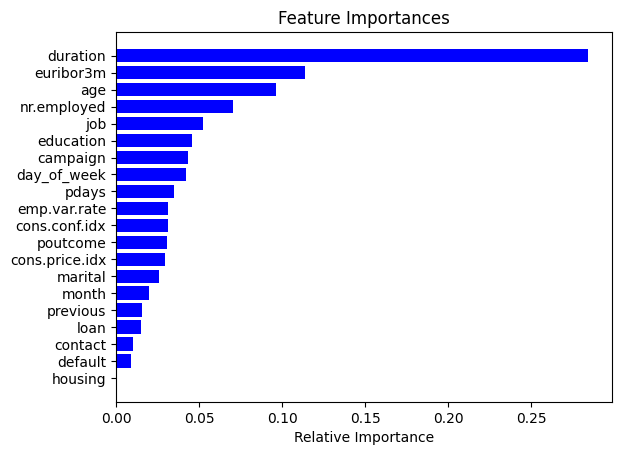

In [55]:
feature_importances = Model_Random_Forest.feature_importances_
col_names = X.columns
indices = np.argsort(feature_importances) # sortiere die Feature Importances absteigend

plt.title('Feature Importances') # Titel des Bildes
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center') # plotte die einzelnen Feature Importances
plt.yticks(range(len(indices)), [col_names[i] for i in indices]) # beschrifte die einzelnen Werte auf der Y-Achse
plt.xlabel('Relative Importance')
plt.show()

Wir sehen daß Duration bei weitem der wichtigste Indikator für Bestimmmen einer Anlage ist oder nicht (ist ja auch plausibel....)